<a href="https://colab.research.google.com/github/Trim0500/SOEN471-Assignment-1/blob/main/SOEN_471_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 2

# Task 1: Data Preparation and Exploration

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [79]:
df = pd.read_csv('customer_churn.csv')
df.head()

,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Preferred_Content_Type,Membership_Type,Payment_Method,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Churn
0,1,56,35,62.579266,73,TV Shows,Basic,PayPal,0,7,8,0
1,2,69,15,159.714415,1,Sports,Basic,Credit Card,0,7,21,0
2,3,46,25,41.119547,36,Movies,Premium,PayPal,0,5,13,1
3,4,32,28,183.961735,35,Movies,Standard,Credit Card,0,0,27,0
4,5,60,10,87.782848,66,Movies,Standard,Bank Transfer,0,7,18,0


In [80]:
print(len(df))

1000


In [4]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Churn
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.81900,18.218000,100.794546,50.387000,0.154000,4.546000,15.268000,0.265000
std,288.819436,14.99103,10.177822,56.477606,28.224171,0.361129,2.919316,8.225317,0.441554
min,1.000000,18.00000,1.000000,5.036738,1.000000,0.000000,0.000000,1.000000,0.000000
25%,250.750000,31.00000,9.000000,50.383080,26.000000,0.000000,2.000000,9.000000,0.000000
50%,500.500000,44.00000,18.000000,100.234954,51.000000,0.000000,5.000000,15.000000,0.000000
75%,750.250000,56.00000,27.000000,150.445885,75.000000,0.000000,7.000000,22.000000,1.000000
max,1000.000000,69.00000,35.000000,199.944192,99.000000,1.000000,9.000000,29.000000,1.000000


In [5]:
missing_values = df.isnull().sum()
print(missing_values)


CustomerID                    0
Age                           0
Subscription_Length_Months    0
Watch_Time_Hours              0
Number_of_Logins              0
Preferred_Content_Type        0
Membership_Type               0
Payment_Method                0
Payment_Issues                0
Number_of_Complaints          0
Resolution_Time_Days          0
Churn                         0
dtype: int64


### It seems that there is no null  

## Bar Charts of numerical Variables

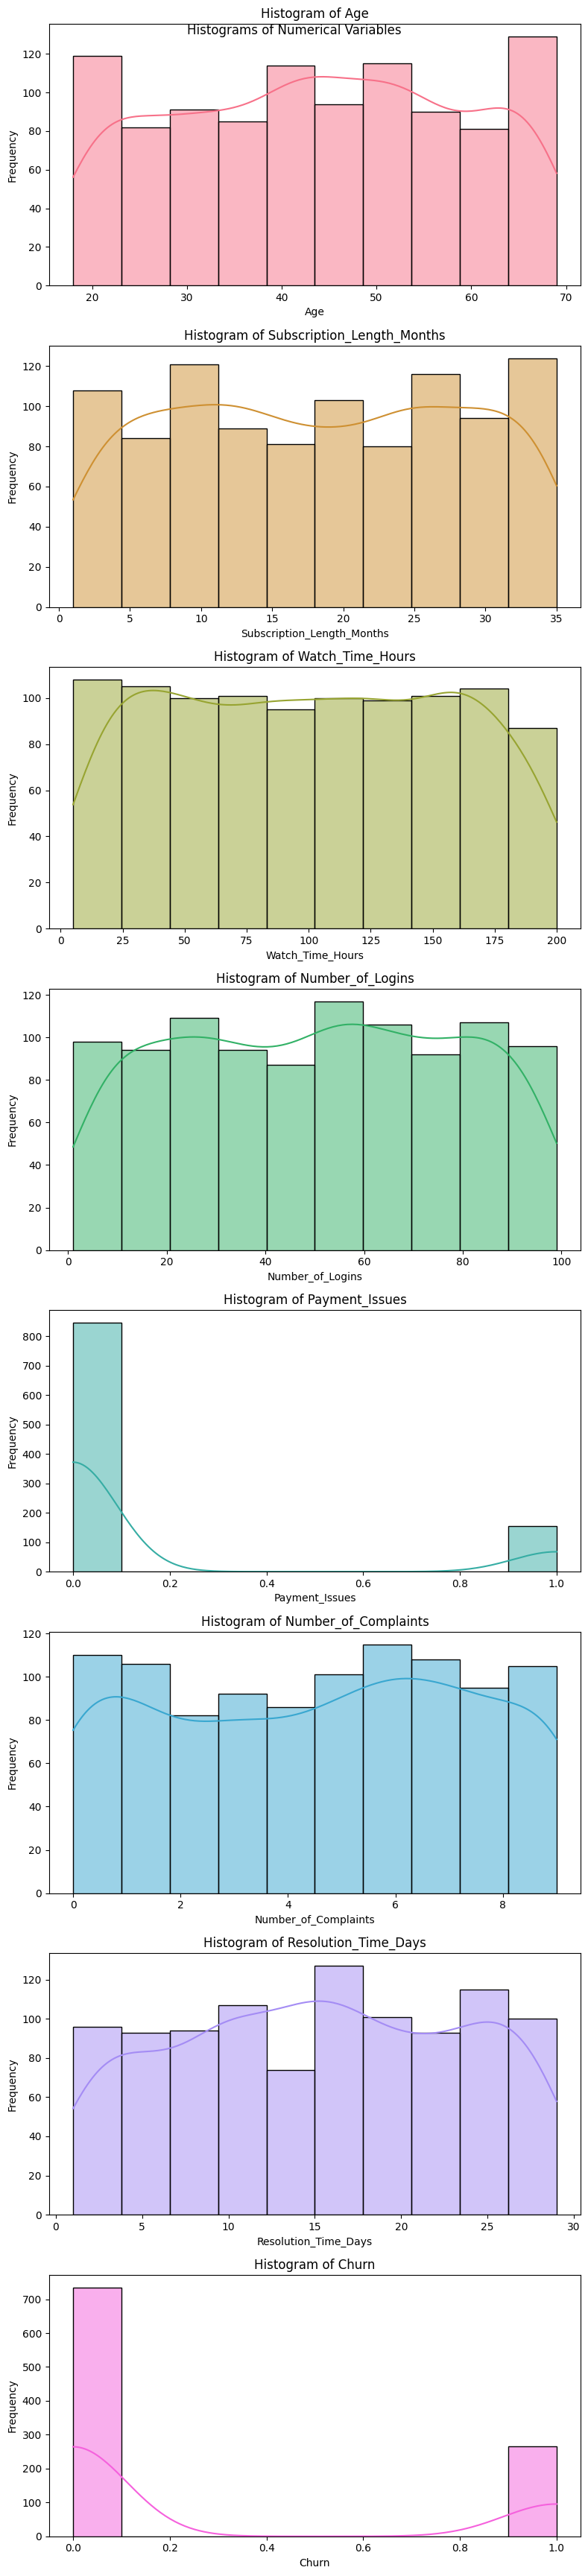

In [6]:
num_cols = df.select_dtypes(include=['number']).columns[1:]
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 35))

for ax, col in zip(axes, num_cols):
    sns.histplot(data=df, x=col, bins=10, edgecolor="black", kde=True, color=sns.color_palette("husl", len(num_cols))[num_cols.get_loc(col)], ax=ax)
    ax.set_title(f"Histogram of {col}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(col)

plt.suptitle("Histograms of Numerical Variables")
plt.tight_layout()
plt.show()


## Bar Chart of categorical Variables

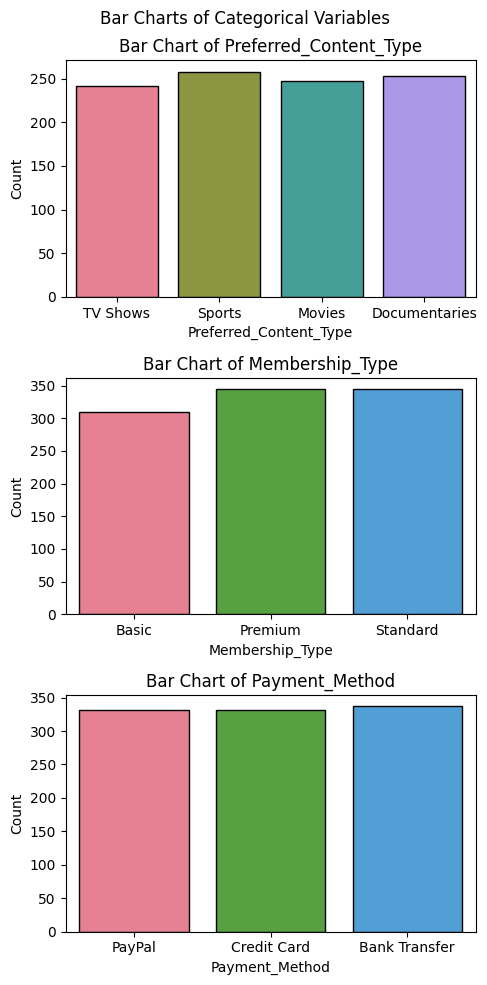

In [7]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
fig, axes = plt.subplots(nrows=len(cat_cols), figsize=(5, 10))

for ax, col in zip(axes, cat_cols):
    sns.countplot(data=df, x=col, ax=ax, edgecolor="black", hue=col, legend=False, palette="husl")

    ax.set_title(f"Bar Chart of {col}")
    ax.set_ylabel("Count")
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=0)

plt.suptitle("Bar Charts of Categorical Variables")
plt.tight_layout()
plt.show()


### Most of the features seem to be uniformly distributed

## Box plots

C:\Users\marcl\AppData\Local\Temp\ipykernel_3388\2998576374.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Preferred_Content_Type"], y=df["Watch_Time_Hours"], palette="coolwarm")


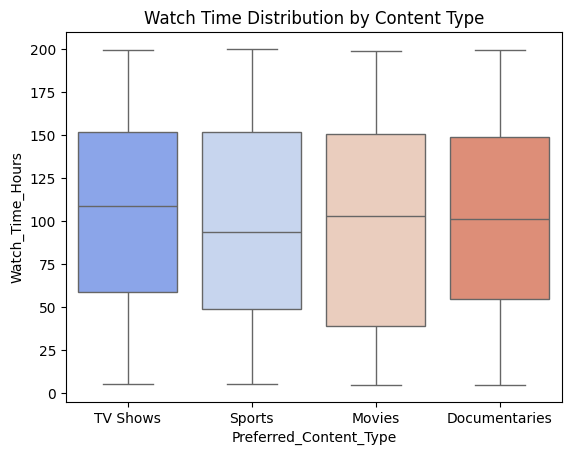

In [8]:
sns.boxplot(x=df["Preferred_Content_Type"], y=df["Watch_Time_Hours"], palette="coolwarm")
plt.title("Watch Time Distribution by Content Type")
plt.show()


C:\Users\marcl\AppData\Local\Temp\ipykernel_3388\2496628304.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Membership_Type"], y=df["Subscription_Length_Months"], palette="coolwarm")


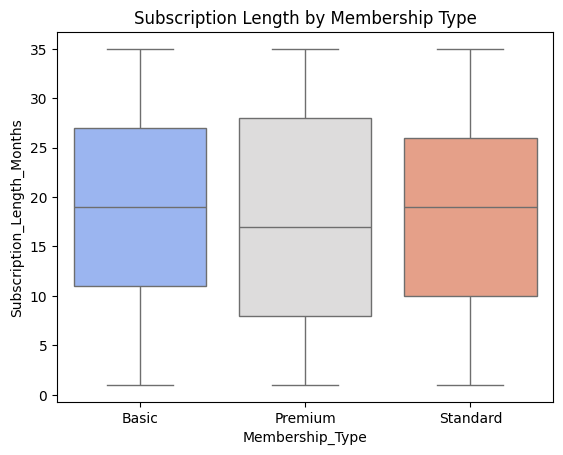

In [9]:
sns.boxplot(x=df["Membership_Type"], y=df["Subscription_Length_Months"], palette="coolwarm")
plt.title("Subscription Length by Membership Type")
plt.show()


C:\Users\marcl\AppData\Local\Temp\ipykernel_3388\940142065.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Payment_Method"], y=df["Resolution_Time_Days"], palette="coolwarm")


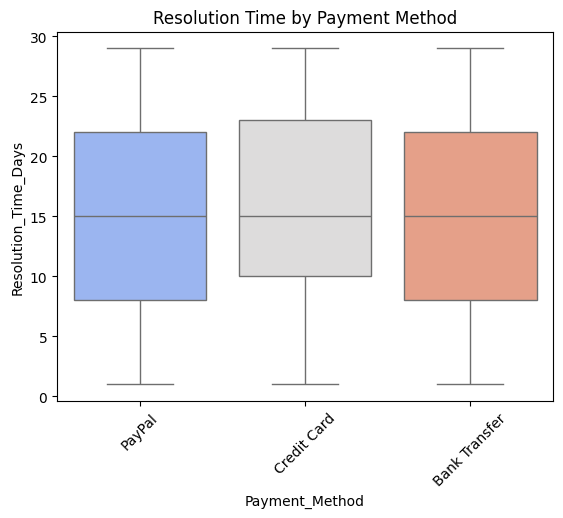

In [10]:
sns.boxplot(x=df["Payment_Method"], y=df["Resolution_Time_Days"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Resolution Time by Payment Method")
plt.show()


C:\Users\marcl\AppData\Local\Temp\ipykernel_3388\3823876159.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Churn"], y=df["Watch_Time_Hours"], palette="coolwarm")


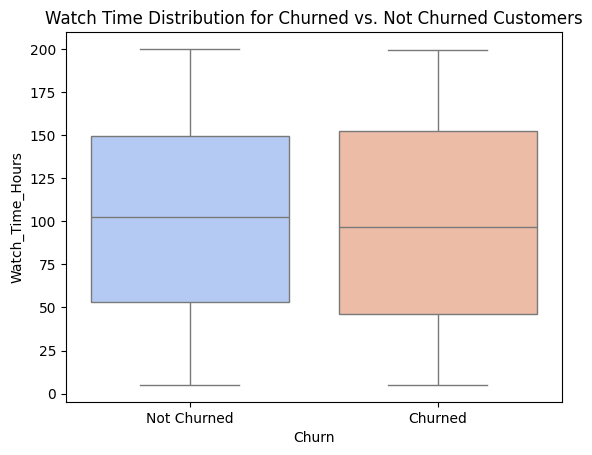

In [11]:
sns.boxplot(x=df["Churn"], y=df["Watch_Time_Hours"], palette="coolwarm")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.title("Watch Time Distribution for Churned vs. Not Churned Customers")
plt.show()


C:\Users\marcl\AppData\Local\Temp\ipykernel_3388\3831174108.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Churn"], y=df["Number_of_Logins"], palette="coolwarm")


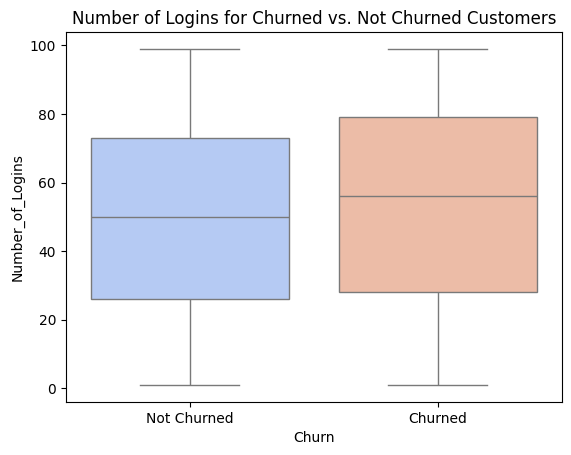

In [12]:
sns.boxplot(x=df["Churn"], y=df["Number_of_Logins"], palette="coolwarm")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.title("Number of Logins for Churned vs. Not Churned Customers")
plt.show()


## Correlations between variables

In [13]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                            CustomerID       Age  Subscription_Length_Months  \
CustomerID                    1.000000 -0.011816                   -0.006179   
Age                          -0.011816  1.000000                   -0.018938   
Subscription_Length_Months   -0.006179 -0.018938                    1.000000   
Watch_Time_Hours              0.032126 -0.046360                    0.024732   
Number_of_Logins              0.025595  0.018846                   -0.056609   
Preferred_Content_Type       -0.039670 -0.006083                   -0.015414   
Membership_Type               0.011634 -0.007896                   -0.007250   
Payment_Method                0.063396  0.040888                    0.012030   
Payment_Issues                0.003177 -0.026649                   -0.024939   
Number_of_Complaints          0.008697  0.059649                    0.015968   
Resolution_Time_Days          0.062073 -0.001181                   -0.020476   
Churn                        -0.005506  

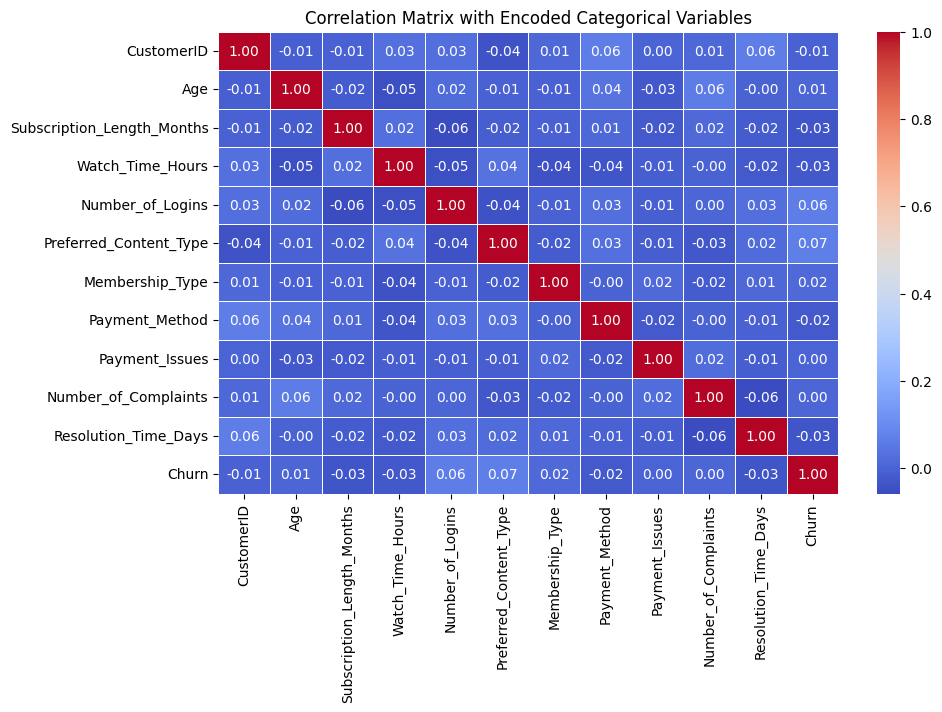

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with Encoded Categorical Variables")
plt.show()


### There doesnt seem to be any significant linear correlation between the variables


# Task 2: Building a Decision Tree Classifier

For the purposes of better utilizing sklearn's decision tree model, we will use the label encoded version of the data

In [16]:
df_encoded

,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Preferred_Content_Type,Membership_Type,Payment_Method,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Churn
0,1,56,35,62.579266,73,3,0,2,0,7,8,0
1,2,69,15,159.714415,1,2,0,1,0,7,21,0
2,3,46,25,41.119547,36,1,1,2,0,5,13,1
3,4,32,28,183.961735,35,1,2,1,0,0,27,0
4,5,60,10,87.782848,66,1,2,0,0,7,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,60,31,128.416734,68,1,1,1,0,9,4,1
996,997,64,10,18.460760,12,1,1,1,0,2,11,1
997,998,62,13,6.104834,60,0,1,1,0,0,5,0
998,999,35,31,187.732751,27,3,0,0,1,8,2,0


In [65]:
Data = df_encoded.drop(columns=['Churn'])  
Targets = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(Data, Targets, test_size=0.2, random_state=5) #ensuring code reproducability

Tree = DecisionTreeClassifier(random_state=5)

#parameters to be tested in grid search
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  
    'max_depth': [3, 5, 10, 15, 20, 30],  
    'min_samples_leaf': [1, 2, 4, 8], 
    'max_features': [None, 'auto', 'sqrt', 'log2'], 
}

grid_search = GridSearchCV(Tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_Tree = grid_search.best_estimator_
best_Tree.fit(X_train, y_train)
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 8}


In [76]:
y_pred = best_Tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("recall: "+str(recall))
print("f1: "+str(f1))

Accuracy: 0.72
Precision: 0.7987939698492462
recall: 0.72
f1: 0.6077515628150837


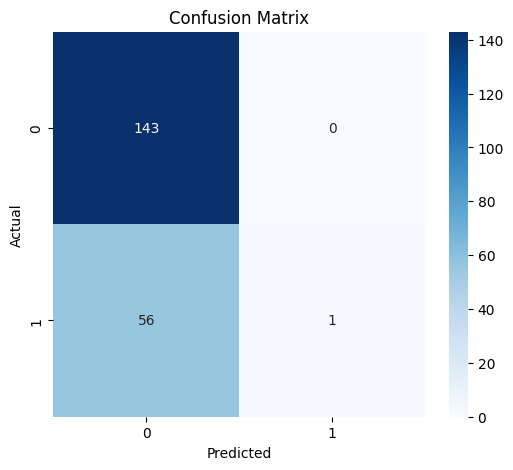

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Targets), yticklabels=np.unique(Targets))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

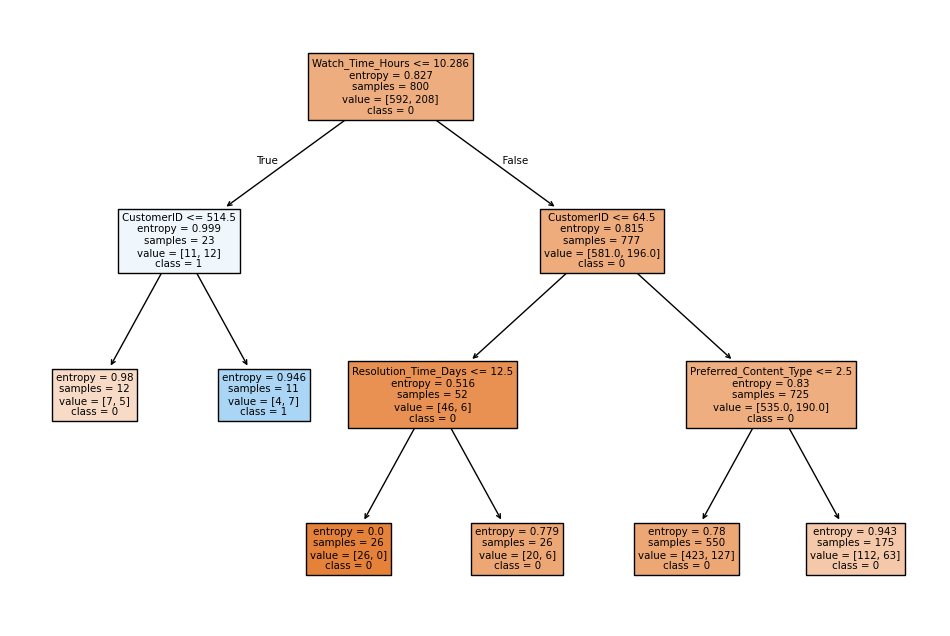

In [68]:
plt.figure(figsize=(12, 8))
plot_tree(best_Tree, feature_names=Data.columns, class_names=['0','1'], filled=True)
plt.show()

# Task 3: Improving Performance with Random Forests

In [82]:
Random_forest = RandomForestClassifier(random_state=5, n_jobs=-1)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 200],   
    'max_depth': [3, 5, 10, 15, 20, 30],
    'min_samples_leaf': [1, 2, 4, 8],    
    'max_features': [None, 'auto', 'sqrt', 'log2'] 
}

grid_search = GridSearchCV(Random_forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_RF = grid_search.best_estimator_
best_RF.fit(X_train, y_train)
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}


In [84]:
y_pred = best_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred)
precision_RF = precision_score(y_test, y_pred, average='weighted')
recall_RF = recall_score(y_test, y_pred, average='weighted')
f1_RF = f1_score(y_test, y_pred, average='weighted')
print("Accuracy: "+str(accuracy_RF))
print("Precision: "+str(precision_RF))
print("recall: "+str(recall_RF))
print("f1: "+str(f1_RF))

Accuracy: 0.715
Precision: 0.5112249999999999
recall: 0.715
f1: 0.5961807580174928


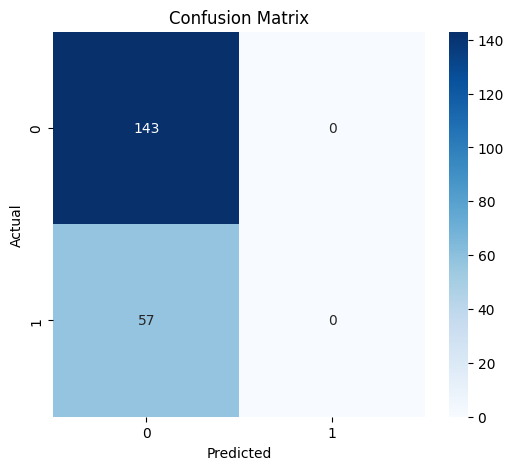

In [86]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Targets), yticklabels=np.unique(Targets))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [87]:
feature_importance = best_RF.feature_importances_
feature_names = Data.columns
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[::-1]
for i in sorted_idx:
    print(feature_names[i]+', importance score: '+str(feature_importance[i]))


Watch_Time_Hours, importance score: 0.20742943448740486
CustomerID, importance score: 0.15857874355498477
Number_of_Logins, importance score: 0.14850483013236124
Subscription_Length_Months, importance score: 0.12575666284350007
Preferred_Content_Type, importance score: 0.10637327346080215
Age, importance score: 0.08036811172320725
Resolution_Time_Days, importance score: 0.0762067111142706
Number_of_Complaints, importance score: 0.05932704140013988
Membership_Type, importance score: 0.015654882391050395
Payment_Method, importance score: 0.01266329465119199
Payment_Issues, importance score: 0.009137014241086983


From the different metric scores calculated, the random forest model did not in fact perform better than the decision tree. One possible avenue of explanation for this is big overfitting due to the small data size of only 1000 entries, which can cause overfitting even for one decision tree.